# The Bake Chef Project

Here's some EDA

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [10]:
data = pd.read_csv('../data/BakeChefData - Sheet1.csv')
data.head()

,NAME,SUB,BREAD,SUB_SAUCE,MAYO,CUCUMBER,CARROTS,LETTUCE,CILANTRO,ONIONS,JALAPENO,SALT,PEPPER,SOY SAUCE,HOT SAUCE
0,Anna,Beef Satay (no Cheese),White,0,1,1,1,1,1,0,1,1,1,0,0
1,Rulan,Spicy Beef w/ Cheese,White,1,0,1,1,1,1,1,1,1,1,1,1
2,Rulan,Spicy Beef w/ Cheese,White,1,0,1,1,1,1,1,1,1,1,0,1
3,Rulan,Spicy Beef w/ Cheese,White,1,0,1,1,1,1,1,1,1,1,0,1
4,Jaide,Beef Satay w/ Cheese,Brown,1,0,1,1,1,0,0,0,1,1,0,0


How about which toppings seem to go together?

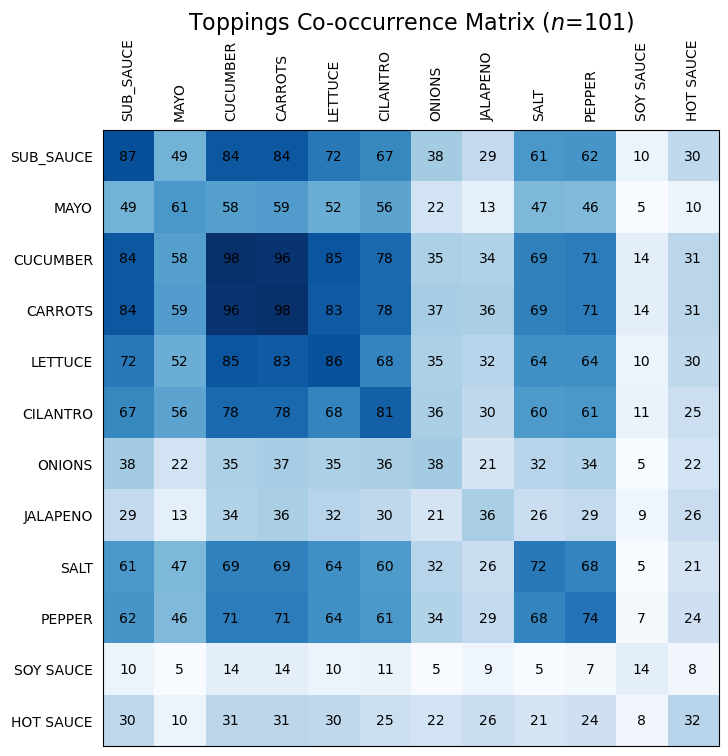

In [16]:
# Remove string columns
toppings = data.iloc[:,3:]
# Dot product of toppings matrix
t_mat = toppings.T.dot(toppings).to_numpy()
t_mat_norm = np.round(np.divide(t_mat, len(data)),2)
# Plot
fig, ax = plt.subplots(figsize=(8,8))
plt.imshow(t_mat_norm, cmap='Blues')
fig.patch.set_facecolor('white')
plt.title(r'Toppings Co-occurrence Matrix ($n$={0})'.format(len(data)), fontsize=16)
# Handle ticks
plt.tick_params(labelbottom=False,labeltop=True)
plt.xticks(range(12), labels=toppings.columns, rotation=90)
plt.yticks(range(12), labels=toppings.columns)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add numbers
for i in range(12):
    for j in range(12):
        text = ax.text(j, i, t_mat[i, j],
                       ha="center", va="center", color="k")

plt.savefig('../data/viz/topping-heatmap.png', dpi=400, bbox_inches='tight')
plt.show()

In [12]:
data['NAME'].value_counts()

NAME
Jordan       32
Rulan        14
Jaide         9
Derek         8
Anna          5
Zach          5
Meagan        4
Brad          4
Aldebaran     2
Ishruna       2
Byron         2
Micheal       2
Mary G        2
May Lynn      2
Graham        2
Rishabh       1
Vardaan       1
Bill          1
AJ            1
Eric          1
Barb          1
Name: count, dtype: int64

Most common unique orders

In [13]:
data.iloc[:,1:].value_counts()

SUB                        BREAD  SUB_SAUCE  MAYO  CUCUMBER  CARROTS  LETTUCE  CILANTRO  ONIONS  JALAPENO  SALT  PEPPER  SOY SAUCE  HOT SAUCE
Spicy Beef w/ Cheese       White  1          0     1         1        1        1         1       1         1     1       0          1            12
Beef Satay w/ Cheese       White  1          1     1         1        1        1         1       0         1     1       0          0            10
                           Brown  1          0     1         1        1        0         0       0         1     1       0          0             9
Spicy Beef w/ Cheese       White  1          1     1         1        1        1         0       0         0     0       0          0             5
                           Brown  0          1     1         1        1        1         0       0         1     1       0          0             3
Chicken Satay w/ Cheese    Brown  1          0     1         1        0        1         0       0         0     0    